In [1]:
import numpy as np
from scipy.linalg import schur,eigvals

arr = np.array([[0,2,2],[0,1,2],[1,0,1]])

T , Z = schur(arr)

print(T)
print(Z)

[[ 2.65896708  1.42440458 -1.92933439]
 [ 0.         -0.32948354 -0.49063704]
 [ 0.          1.31178921 -0.32948354]]
[[ 0.72711591 -0.60156188  0.33079564]
 [ 0.52839428  0.79801892  0.28976765]
 [ 0.43829436  0.03590414 -0.89811411]]


In [3]:
import numpy as np
from linear_solvers import NumPyLinearSolver, HHL
matrix = np.array([ [1, -1/3], [-1/3, 1] ])
vector = np.array([1, 0])
naive_hhl_solution = HHL().solve(matrix, vector)

In [4]:
classical_solution = NumPyLinearSolver().solve(matrix,vector/np.linalg.norm(vector))

In [5]:
from linear_solvers.matrices.tridiagonal_toeplitz import TridiagonalToeplitz
tridi_matrix = TridiagonalToeplitz(1, 1, -1 / 3)
tridi_solution = HHL().solve(tridi_matrix, vector)

In [6]:
print('classical state:', classical_solution.state)

classical state: [1.125 0.375]


In [7]:
print('naive state:')
print(naive_hhl_solution.state)
print('tridiagonal state:')
print(tridi_solution.state)

naive state:
       ┌─────────────┐┌──────┐        ┌─────────┐
  q26: ┤ circuit-308 ├┤3     ├────────┤3        ├
       └─────────────┘│      │┌──────┐│         │
q27_0: ───────────────┤0     ├┤2     ├┤0        ├
                      │  QPE ││      ││  QPE_dg │
q27_1: ───────────────┤1     ├┤1     ├┤1        ├
                      │      ││  1/x ││         │
q27_2: ───────────────┤2     ├┤0     ├┤2        ├
                      └──────┘│      │└─────────┘
  q28: ───────────────────────┤3     ├───────────
                              └──────┘           
tridiagonal state:
       ┌─────────────┐┌──────┐        ┌─────────┐
  q48: ┤ circuit-521 ├┤3     ├────────┤3        ├
       └─────────────┘│      │┌──────┐│         │
q49_0: ───────────────┤0     ├┤2     ├┤0        ├
                      │  QPE ││      ││  QPE_dg │
q49_1: ───────────────┤1     ├┤1     ├┤1        ├
                      │      ││  1/x ││         │
q49_2: ───────────────┤2     ├┤0     ├┤2        ├
                  

In [8]:
print('classical Euclidean norm:', classical_solution.euclidean_norm)
print('naive Euclidean norm:', naive_hhl_solution.euclidean_norm)
print('tridiagonal Euclidean norm:', tridi_solution.euclidean_norm)

classical Euclidean norm: 1.1858541225631423
naive Euclidean norm: 1.1858541225631387
tridiagonal Euclidean norm: 1.1858541225631365


In [44]:
from qiskit.quantum_info import Statevector
import numpy as np

naive_sv = Statevector(naive_hhl_solution.state).data
tridi_sv = Statevector(tridi_solution.state).data

# Extract vector components; 10000(bin) == 16 & 10001(bin) == 17
naive_full_vector = np.array([naive_sv[16], naive_sv[17] ])
tridi_full_vector = np.array([tridi_sv[16], tridi_sv[17] ])

print(np.array(naive_sv))
print(np.array(tridi_sv))
print('naive raw solution vector:', naive_full_vector)
print('tridi raw solution vector:', tridi_full_vector)

[ 8.94535833e-01+6.14333788e-08j -8.71080331e-02+5.29318705e-09j
 -5.62078408e-02+3.87800218e-09j ... -1.01218068e-03+2.22895854e-10j
 -8.34603702e-04-6.15734509e-10j  1.03052404e-04+2.89225442e-10j]
[ 0.89560841-8.21241494e-17j -0.08528949+2.23898447e-05j
 -0.05460554-3.56145516e-05j ...  0.        +0.00000000e+00j
  0.        +0.00000000e+00j  0.        +0.00000000e+00j]
naive raw solution vector: [ 2.03064984e-10-0.00268474j -1.43681950e-10-0.00016529j]
tridi raw solution vector: [ 9.17625829e-06-0.0024201j  -3.10675275e-05-0.00015473j]


In [10]:
def get_solution_vector(solution):
    """Extracts and normalizes simulated state vector
    from LinearSolverResult."""
    solution_vector = Statevector(solution.state).data[16:18].real
    norm = solution.euclidean_norm
    return norm * solution_vector / np.linalg.norm(solution_vector)

print('full naive solution vector:', get_solution_vector(naive_hhl_solution))
print('full tridi solution vector:', get_solution_vector(tridi_solution))
print('classical state:', classical_solution.state)

full naive solution vector: [1.125 0.375]
full tridi solution vector: [1.125 0.375]
classical state: [1.125 0.375]


In [11]:
from scipy.sparse import diags

NUM_QUBITS = 2
MATRIX_SIZE = 2 ** NUM_QUBITS
# entries of the tridiagonal Toeplitz symmetric matrix
a = 1
b = -1/3

matrix = diags([b, a, b],
               [-1, 0, 1],
               shape=(MATRIX_SIZE, MATRIX_SIZE)).toarray()

vector = np.array([1] + [0]*(MATRIX_SIZE - 1))
# run the algorithms
classical_solution = NumPyLinearSolver().solve(matrix, vector / np.linalg.norm(vector))
naive_hhl_solution = HHL().solve(matrix, vector)
tridi_matrix = TridiagonalToeplitz(NUM_QUBITS, a, b)
tridi_solution = HHL().solve(tridi_matrix, vector)

print('classical euclidean norm:', classical_solution.euclidean_norm)
print('naive euclidean norm:', naive_hhl_solution.euclidean_norm)
print('tridiagonal euclidean norm:', tridi_solution.euclidean_norm)

classical euclidean norm: 1.237833351044751
naive euclidean norm: 1.2099806231118846
tridiagonal euclidean norm: 1.209457721870527


In [12]:
from qiskit import transpile

MAX_QUBITS = 4
a = 1
b = -1/3

i = 1
# calculate the circuit depths for different number of qubits to compare the use
# of resources (WARNING: This will take a while to execute)
naive_depths = []
tridi_depths = []
for n_qubits in range(1, MAX_QUBITS+1):
    matrix = diags([b, a, b],
                   [-1, 0, 1],
                   shape=(2**n_qubits, 2**n_qubits)).toarray()
    vector = np.array([1] + [0]*(2**n_qubits -1))

    naive_hhl_solution = HHL().solve(matrix, vector)
    tridi_matrix = TridiagonalToeplitz(n_qubits, a, b)
    tridi_solution = HHL().solve(tridi_matrix, vector)

    naive_qc = transpile(naive_hhl_solution.state,
                         basis_gates=['id', 'rz', 'sx', 'x', 'cx'])
    tridi_qc = transpile(tridi_solution.state,
                         basis_gates=['id', 'rz', 'sx', 'x', 'cx'])

    naive_depths.append(naive_qc.depth())
    tridi_depths.append(tridi_qc.depth())
    i +=1

In [13]:
sizes = [f"{2**n_qubits}×{2**n_qubits}"
         for n_qubits in range(1, MAX_QUBITS+1)]
columns = ['size of the system',
           'quantum_solution depth',
           'tridi_solution depth']
data = np.array([sizes, naive_depths, tridi_depths])
ROW_FORMAT ="{:>23}" * (len(columns) + 2)
for team, row in zip(columns, data):
    print(ROW_FORMAT.format(team, *row))

     size of the system                    2×2                    4×4                    8×8                  16×16
 quantum_solution depth                    334                   2562                  33172                 351483
   tridi_solution depth                    565                   5107                  14756                  46552


In [14]:
print('excess:',[naive_depths[i] - tridi_depths[i] for i in range(0, len(naive_depths))])

excess: [-231, -2545, 18416, 304931]


In [15]:
from linear_solvers.observables import AbsoluteAverage, MatrixFunctional

In [16]:
NUM_QUBITS = 1
MATRIX_SIZE = 2 ** NUM_QUBITS
# entries of the tridiagonal Toeplitz symmetric matrix
a = 1
b = -1/3

matrix = diags([b, a, b],
               [-1, 0, 1],
               shape=(MATRIX_SIZE, MATRIX_SIZE)).toarray()
vector = np.array([1] + [0]*(MATRIX_SIZE - 1))
tridi_matrix = TridiagonalToeplitz(1, a, b)

average_solution = HHL().solve(tridi_matrix,
                               vector,
                               AbsoluteAverage())
classical_average = NumPyLinearSolver(
                        ).solve(matrix,
                                vector / np.linalg.norm(vector),
                                AbsoluteAverage())

print('quantum average:', average_solution.observable)
print('classical average:', classical_average.observable)
print('quantum circuit results:', average_solution.circuit_results)

quantum average: 0.7499999999999962
classical average: 0.75
quantum circuit results: (0.4999999999999952+0j)


In [17]:
observable = MatrixFunctional(1, 1 / 2)

functional_solution = HHL().solve(tridi_matrix, vector, observable)
classical_functional = NumPyLinearSolver(
                          ).solve(matrix,
                                  vector / np.linalg.norm(vector),
                                  observable)

print('quantum functional:', functional_solution.observable)
print('classical functional:', classical_functional.observable)
print('quantum circuit results:', functional_solution.circuit_results)

quantum functional: 1.8281249999999818
classical functional: 1.828125
quantum circuit results: [(0.6249999999999941+0j), (0.4999999999999952+0j), (0.1249999999999988+0j)]


In [18]:
from qiskit import Aer

backend = Aer.get_backend('aer_simulator')
hhl = HHL(1e-3, quantum_instance=backend)

accurate_solution = hhl.solve(matrix, vector)
classical_solution = NumPyLinearSolver(
                    ).solve(matrix,
                            vector / np.linalg.norm(vector))

print(accurate_solution.euclidean_norm)
print(classical_solution.euclidean_norm)

1.1858541225631387
1.1858541225631423


In [19]:
from qiskit import QuantumRegister, QuantumCircuit
import numpy as np

t = 2  # This is not optimal; As an exercise, set this to the
       # value that will get the best results. See section 8 for solution.

NUM_QUBITS = 4  # Total number of qubits
nb = 1  # Number of qubits representing the solution
nl = 2  # Number of qubits representing the eigenvalues

theta = 0  # Angle defining |b>

a = 1  # Matrix diagonal
b = -1/3  # Matrix off-diagonal

# Initialize the quantum and classical registers
qr = QuantumRegister(NUM_QUBITS)

# Create a Quantum Circuit
qc = QuantumCircuit(qr)

qrb = qr[0:nb]
qrl = qr[nb:nb+nl]
qra = qr[nb+nl:nb+nl+1]

# State preparation.
qc.ry(2*theta, qrb[0])

# QPE with e^{iAt}
for qu in qrl:
    qc.h(qu)

qc.p(a*t, qrl[0])
qc.p(a*t*2, qrl[1])

qc.u(b*t, -np.pi/2, np.pi/2, qrb[0])


# Controlled e^{iAt} on \lambda_{1}:
params=b*t

qc.p(np.pi/2,qrb[0])
qc.cx(qrl[0],qrb[0])
qc.ry(params,qrb[0])
qc.cx(qrl[0],qrb[0])
qc.ry(-params,qrb[0])
qc.p(3*np.pi/2,qrb[0])

# Controlled e^{2iAt} on \lambda_{2}:
params = b*t*2

qc.p(np.pi/2,qrb[0])
qc.cx(qrl[1],qrb[0])
qc.ry(params,qrb[0])
qc.cx(qrl[1],qrb[0])
qc.ry(-params,qrb[0])
qc.p(3*np.pi/2,qrb[0])

# Inverse QFT
qc.h(qrl[1])
qc.rz(-np.pi/4,qrl[1])
qc.cx(qrl[0],qrl[1])
qc.rz(np.pi/4,qrl[1])
qc.cx(qrl[0],qrl[1])
qc.rz(-np.pi/4,qrl[0])
qc.h(qrl[0])

# Eigenvalue rotation
t1=(-np.pi +np.pi/3 - 2*np.arcsin(1/3))/4
t2=(-np.pi -np.pi/3 + 2*np.arcsin(1/3))/4
t3=(np.pi -np.pi/3 - 2*np.arcsin(1/3))/4
t4=(np.pi +np.pi/3 + 2*np.arcsin(1/3))/4

qc.cx(qrl[1],qra[0])
qc.ry(t1,qra[0])
qc.cx(qrl[0],qra[0])
qc.ry(t2,qra[0])
qc.cx(qrl[1],qra[0])
qc.ry(t3,qra[0])
qc.cx(qrl[0],qra[0])
qc.ry(t4,qra[0])
qc.measure_all()

print(f"Depth: {qc.depth()}")
print(f"CNOTS: {qc.count_ops()['cx']}")
qc.draw(fold=-1)

Depth: 26
CNOTS: 10


┌───────┐┌──────────────────────┐┌────────┐┌───┐┌──────────────┐┌───┐┌─────────────┐┌─────────┐┌────────┐┌───┐┌─────────────┐┌───┐┌────────────┐┌─────────┐                                                                                                               ░ ┌─┐         
q8078_0: ┤ Ry(0) ├┤ U(-0.66667,-π/2,π/2) ├┤ P(π/2) ├┤ X ├┤ Ry(-0.66667) ├┤ X ├┤ Ry(0.66667) ├┤ P(3π/2) ├┤ P(π/2) ├┤ X ├┤ Ry(-1.3333) ├┤ X ├┤ Ry(1.3333) ├┤ P(3π/2) ├───────────────────────────────────────────────────────────────────────────────────────────────────────────────░─┤M├─────────
         └─┬───┬─┘└───────┬──────┬───────┘└────────┘└─┬─┘└──────────────┘└─┬─┘└─────────────┘└─────────┘└────────┘└─┬─┘└─────────────┘└─┬─┘└────────────┘└─────────┘                      ┌──────────┐     ┌───┐                                                                   ░ └╥┘┌─┐      
q8078_1: ──┤ H ├──────────┤ P(2) ├────────────────────■────────────────────■────────────────────────────────────────┼───────────────────┼──────────────────────────────■───────────────■──┤ Rz(-π/4) ├─────┤ H ├────────■────────────────────────────────────────■─────────────────░──╫─┤M├──────
           ├───┤          ├──────┤                                                                                  │                   │      ┌───┐     ┌──────────┐┌─┴─┐┌─────────┐┌─┴─┐└──────────┘     └───┘        │                                        │                 ░  ║ └╥┘┌─┐   
q8078_2: ──┤ H ├──────────┤ P(4) ├──────────────────────────────────────────────────────────────────────────────────■───────────────────■──────┤ H ├─────┤ Rz(-π/4) ├┤ X ├┤ Rz(π/4) ├┤ X ├─────■────────────────────────┼────────────────────■───────────────────┼─────────────────░──╫──╫─┤M├───
           └───┘          └──────┘                                                                                                             └───┘     └──────────┘└───┘└─────────┘└───┘   ┌─┴─┐    ┌──────────────┐┌─┴─┐┌──────────────┐┌─┴─┐┌─────────────┐┌─┴─┐┌────────────┐ ░  ║  ║ └╥┘┌─┐
q8078_3: ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤ X ├────┤ Ry(-0.69352) ├┤ X ├┤ Ry(-0.87728) ├┤ X ├┤ Ry(0.35368) ├┤ X ├┤ Ry(1.2171) ├─░──╫──╫──╫─┤M├
                                                                                                                                                                                             └───┘    └──────────────┘└───┘└──────────────┘└───┘└─────────────┘└───┘└────────────┘ ░  ║  ║  ║ └╥┘
 meas: 4/═════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╩══╩══╩══╩═
                                                                                                                                                                                                                                                                                      0  1  2  3

In [ ]:
from qiskit import IBMQ, transpile,providers, QuantumCircuit, Aer, assemble
from qiskit.utils.mitigation import complete_meas_cal

# Define your IBM Quantum Experience API token
API_TOKEN = '21ce439dcf5c570e143eff2ea9fd49e2384d60fc4b34621638c9d11c9814bc214fbef674347dab4f397b3ac9741cf892cb13df446855bb99ece9388b5c755d12'

# Get the IBMQ provider#
# Load your IBM Quantum Experience account
IBMQ.save_account(API_TOKEN)
IBMQ.load_account()

# Get the provider
provider = IBMQ.get_provider(hub='ibm-q')

In [25]:
# Select an available backend
backend = provider.get_backend('ibmq_qasm_simulator') 
# calibrate using real hardware
layout = [2,3,0,4]
chip_qubits = 5

# Transpiled circuit for the real hardware
qc_qa_cx = transpile(qc, backend=backend, initial_layout=layout)

In [27]:
meas_cals, state_labels = complete_meas_cal(qubit_list=layout,
                                            qr=QuantumRegister(chip_qubits))
qcs = meas_cals + [qc_qa_cx]

job = backend.run(qcs, shots=10)


# Create a job
# job = providers.Job(backend=backend, circuits=[QuantumCircuit()])

# Submit the job
#job_manager = providers.ibmq.managed.IBMQJobManager()
#job_set = job_manager.submit_jobs([job])

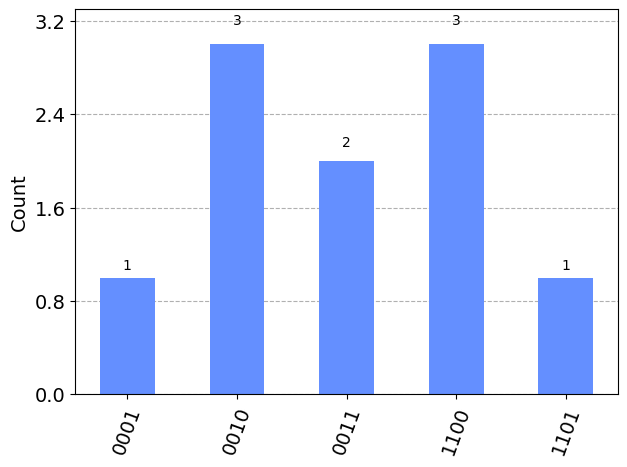

In [41]:
from qiskit.visualization import plot_histogram
# Get the result
result = job.result()
counts = result.get_counts(qc)
plot_histogram(counts)

In [38]:
import qiskit.tools.jupyter
%qiskit_version_table